# **GRADED ASSIGNMENT 3 - Task 2**

This is a programming task dedicated to SVD.

First, make your own copy of the notebook (*File $\rightarrow$ Save a copy in Drive*) or download the notebook to your machine if you prefer to work locally (*File $\rightarrow$ Download*).

Then, implement your solutions to the tasks formulated in the notebook. You can add **code cells** to write some code and **text cells** in case you want to include additional explanations to your answers in plain English.

Finally, attach the link to thi snotebook the submission form. **Make sure that all the cells are executed and all relevant outputs are being printed out**.


## Image compression with SVD

We have seen that SVD allows one to decompose any $m \times n$ matrix $A$, into the product of the orthogonal matrices $U$ and $V$ and a "diagonal" matrix $\Sigma$:

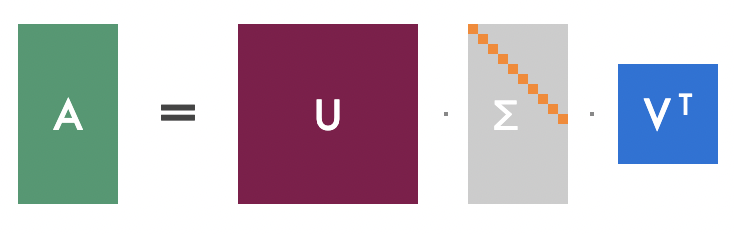

We have also discussed that we can *approximate* the original matrix $A$ by using only some parts of the matrices $U, V$ and $\Sigma$:

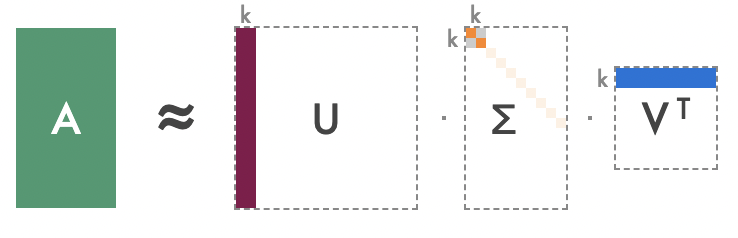

You can notice that this approximation can help us save quite a lot of space. Indeed, inspeat of storing $m \times n$ of the original values in A we now need to store only $m \times k + k + k \times n = k \times (m + n + 1)$ values. **Since images can be represented as matrices of pixel values, we can use this idea and compress images with SVD!**

Here are some videos that explain this idea and give some examples that you might want to watch before attempting the task:
- [SVD and Image Compression](https://youtu.be/DG7YTlGnCEo)
- [SVD: Image Compression in Python](https://youtu.be/H7qMMudo3e8)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

First, let's load the image into a $\texttt{numpy}$ array and display it.

You can use *any* image of your choice, or upload one of the sample images provided [in our repo](https://github.com/girafe-ai/math-basics-for-ai/tree/master/graded%20assignments/img).

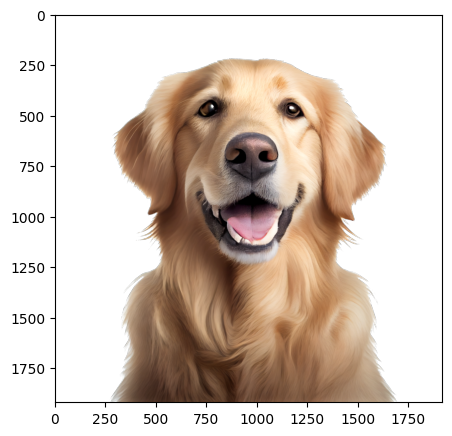

In [16]:
img_rgb = plt.imread('cute-and-happy-dog-png.png')

plt.figure(figsize=(5, 10))
plt.imshow(img_rgb)

Note how image is represented in the RGB format:

In [18]:
print(img_rgb.shape)
img_rgb[750:800, 750:800]

(1920, 1920, 4)


array([[[0.6666667 , 0.52156866, 0.40392157, 1.        ],
        [0.6666667 , 0.5254902 , 0.40392157, 1.        ],
        [0.67058825, 0.52156866, 0.40392157, 1.        ],
        ...,
        [0.6       , 0.45882353, 0.35686275, 1.        ],
        [0.5921569 , 0.4509804 , 0.35686275, 1.        ],
        [0.6       , 0.45882353, 0.36862746, 1.        ]],

       [[0.63529414, 0.4862745 , 0.36078432, 1.        ],
        [0.6431373 , 0.49411765, 0.36862746, 1.        ],
        [0.63529414, 0.4862745 , 0.3647059 , 1.        ],
        ...,
        [0.5803922 , 0.44705883, 0.3372549 , 1.        ],
        [0.5764706 , 0.44313726, 0.34509805, 1.        ],
        [0.5882353 , 0.45490196, 0.3647059 , 1.        ]],

       [[0.6392157 , 0.49019608, 0.3647059 , 1.        ],
        [0.6392157 , 0.48235294, 0.3647059 , 1.        ],
        [0.6392157 , 0.48235294, 0.3647059 , 1.        ],
        ...,
        [0.57254905, 0.4392157 , 0.33333334, 1.        ],
        [0.58431375, 0.454901

For simplicity, let's make our image black-and-white (this way, we'll only need to work with a single channel). We'll do this by averaging the signals from the red, green and blue channels for each pixel.

In [19]:
img_grayscale = np.mean(img_rgb, axis=-1)

Now, our image is represented as an $m \times n$ matrix:

In [20]:
print(img_grayscale.shape)
img_grayscale[750:800, 750:800]

(1920, 1920)


array([[0.6480392 , 0.6490196 , 0.6490196 , ..., 0.6039216 , 0.6       ,
        0.6068628 ],
       [0.62058824, 0.62647057, 0.6215687 , ..., 0.5911765 , 0.5911765 ,
        0.6019608 ],
       [0.62352943, 0.6215687 , 0.6215687 , ..., 0.5862745 , 0.5980392 ,
        0.62647057],
       ...,
       [0.6882353 , 0.6813725 , 0.6754902 , ..., 0.6392157 , 0.6480392 ,
        0.6627451 ],
       [0.72058827, 0.7196079 , 0.7156863 , ..., 0.67156863, 0.67352945,
        0.6666666 ],
       [0.7147059 , 0.7166667 , 0.71862745, ..., 0.6441177 , 0.6441177 ,
        0.63725495]], dtype=float32)

We can plot the grayscale image:

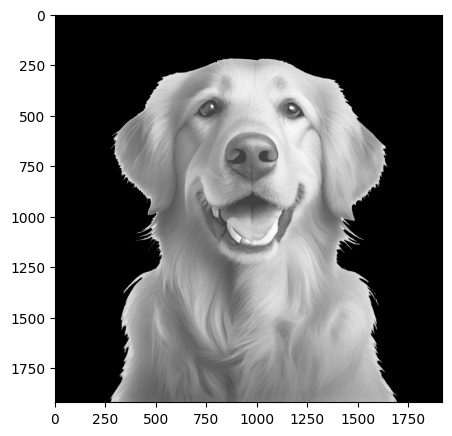

In [21]:
plt.figure(figsize=(5, 10))
plt.imshow(img_grayscale, cmap='gray')

Apply SVD on the image matrix $M$, decomposing it into the product of the orthogonal matrices $U$ and $V$ and a "diagonal" matrix $\Sigma$:

$$M_{m \times n} = U_{m \times m} \Sigma_{m \times n} V_{n \times n}^T$$

*You can use [$\texttt{np.linalg.svd()}$](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) to perform SVD.*

In [22]:
U, sigma, V = np.linalg.svd(img_grayscale)

**(1 point)** Demonstrate how you can get your image matrix back as a product of $U$, $V$ and $\Sigma$ *(express image matrix $M$ as a product of the three matrices and plot the resulting image, making sure it's the same as before)*.

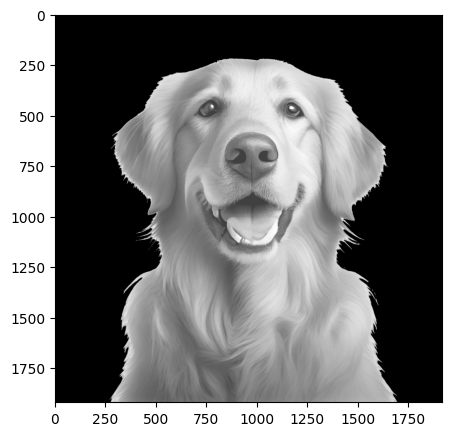

In [45]:
img_reconstructed = U @ np.diag(sigma) @ V

plt.figure(figsize=(5, 10))
plt.imshow(img_reconstructed, cmap='gray')

# Now, let's compress the original image! Remember that with SVD, you can approximate the original  matrix by considering only $p$ of the hidden features:

$$M_{m \times n} \approx U_{m \times p} \Sigma_{p \times p} V_{n \times p}^T$$

**(2 points)** Try reconstructing the image by using only $5, 10, ..., 100$ hidden features. Plot what happens.

*Hint: use [$\texttt{plt.subplot()}$](https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html) to place several images on the same plot.*

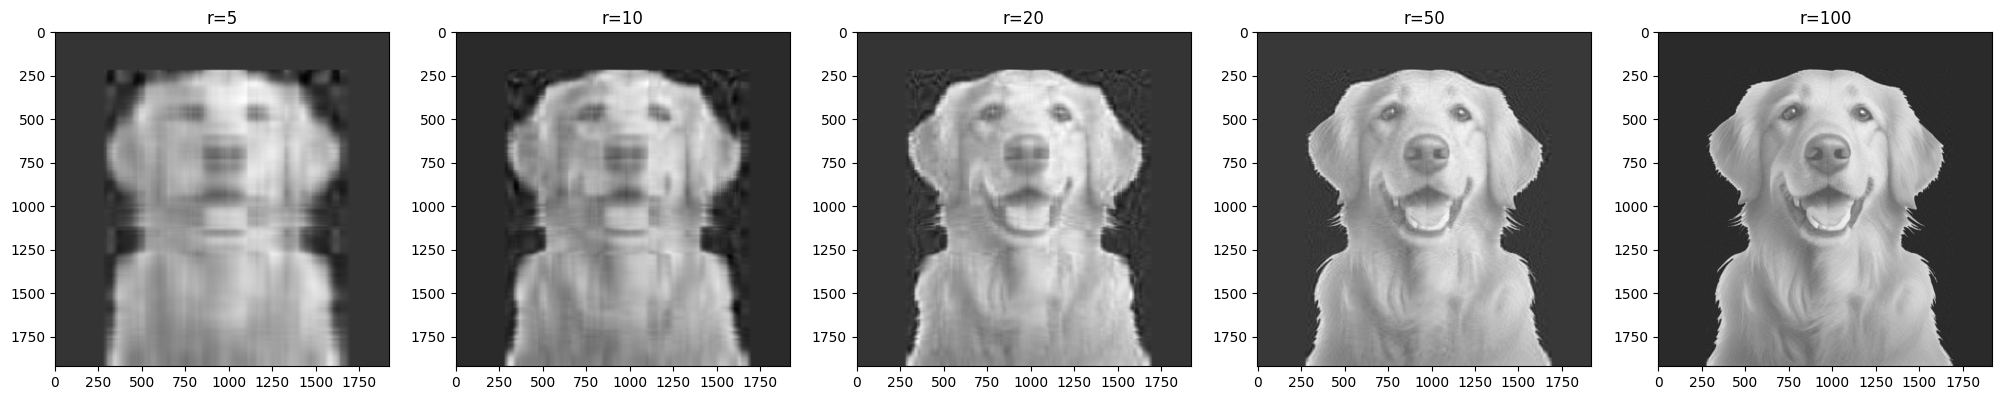

In [44]:
def compress(U, S, V, factor):
  return U[:, :factor] @ np.diag(S[:factor]) @ V[:factor, :]

hidden_features = [5, 10, 20, 50, 100]
fig, (*ax,) = plt.subplots(1, len(hidden_features), figsize=(5 * len(hidden_features), 10))
for r, c_ax in zip(hidden_features, ax):
  compressed_img = compress(U, sigma, V, factor=r)
  c_ax.imshow(compressed_img, cmap='gray')
  c_ax.set_title(f'r={r}')